# Exploring pokemon dataset

### this notebook won't run unless the .ipynb file and the .csv file are in the same folder 
### if you are having problems with the directory copy the absolute path

In [ ]:
#step one import libraries
#facilitates data science
import pandas as pd

#facilitates math
import numpy as np

# New Library!!
import matplotlib.pyplot as plt

#this will display graphs inline (in this notebook)
%matplotlib inline

#specify how large to show figures (length, width)
plt.rcParams["figure.figsize"] = (8, 6)

In [ ]:
#step two read the dataset and assign it to a variable 
#I used an absolute path to make it easier for the library to detet where the dataset was but is optional 
#note please make sure the directory is the same as mine when testing or edit to match the directory in which the dataset is located
pokemon = pd.read_csv("/content/pokemon.csv")

In [ ]:
#check to see if it's working with .head()
#head will override, so I use comments to make sure I'm running the one I want to see. 
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,NaN,NaN,194.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,NaN,NaN,10.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,NaN,NaN,NaN
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,NaN,NaN,NaN
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,NaN,NaN,NaN


### What is the total pokemon from each generatio?

In [ ]:
pokemon_gen = pokemon["Generation"].value_counts()
print(pokemon_gen)

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


### How many pokemon belong to each type?


In [ ]:
poketype = pokemon["Type 1"].value_counts()
print(poketype)

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


Both graphs show us the same types however the diffrence in each is the amount of pokemon that have that type as their primary and the secoind graph shows which pokemons have that type as a secondary

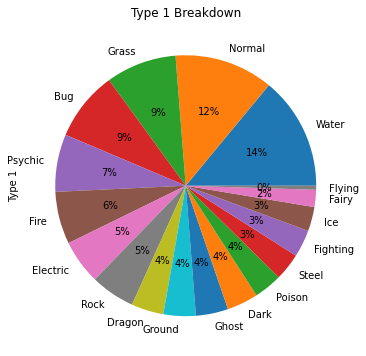

In [ ]:
# all of the pokemon Type 1 graphed

pokeType = pokemon["Type 1"].value_counts()
#print(pokeType)

plt.title("Type 1 Breakdown")
pokeType.plot(kind = "pie", autopct = "%1.0f%%")

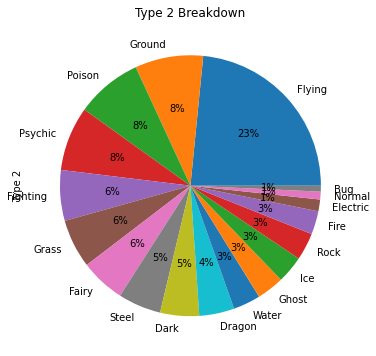

In [ ]:
# all of the pokemon Type 2 graphed

pokeType = pokemon["Type 2"].value_counts()
#print(pokeType)

plt.title("Type 2 Breakdown")
pokeType.plot(kind = "pie", autopct = "%1.0f%%")

### This is a crossbar of type one and two as you can see it shows how many pokemon are of two types.

In [ ]:
poketypes = pd.crosstab(pokemon["Type 1"] == "Normal", pokemon["Type 2"] == "Flying")
print(poketypes)
#how to customize collum names and index in visualization

Type 2  False  True
Type 1             
False     629    73
True       74    24


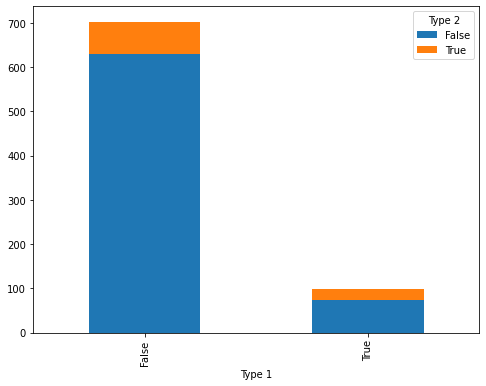

In [ ]:
poketypes.plot(kind = "bar", stacked = True)
#maybe a pie chart would be a better formating 
#analasis based

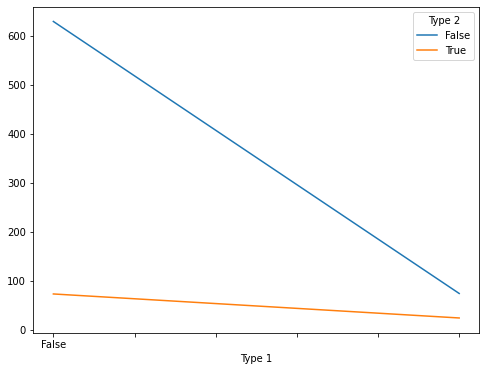

In [ ]:
#just messing with the plotting but This type of graph would not be good for poketypes to me it look messy
#line graphs are really good for time relations not really frecuency of them#
#poketypes = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
poketypes.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dab06fe10>,
      dtype=object)

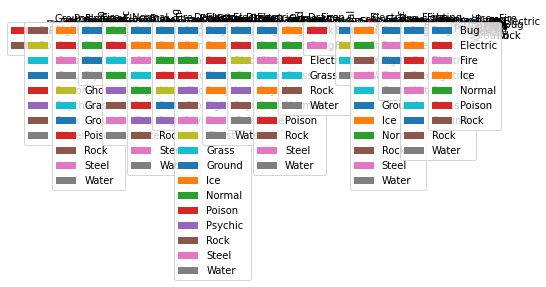

In [ ]:
#you can use pie charts to display a cross but it look really messy if there a lot of crosses
poketypes = pd.crosstab(pokemon["Type 1"], pokemon["Type 2"])
poketypes.plot(kind = "pie", autopct = "%1.0f%%", subplots=True)

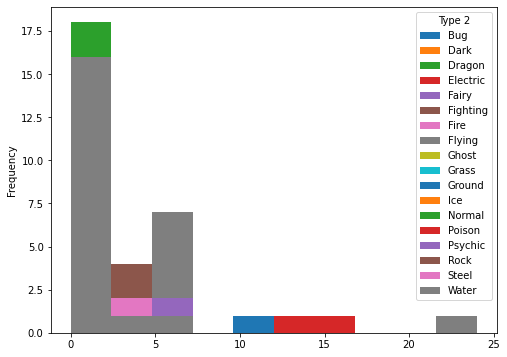

In [ ]:
#this is how you plot a histogram use hist as the kind and I think this is the best to show frecuency in type 1 and type 2
poketypes.plot(kind = "hist")

In [ ]:
# pokemon: how many Flying types have a speed higher than 100
flyingSpeed100 = pd.crosstab(index = pokemon["Type 2"] == "Flying", columns = pokemon["Speed"] > 100)
flyingSpeed100 

Speed,False,True
Type 2,,
False,619,84
True,75,22


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4da9f64f10>,
      dtype=object)

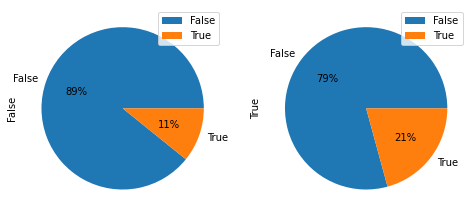

In [ ]:
#you can display a cross by enableing subplots to true
flyingSpeed100.plot(kind = "pie", autopct = "%1.0f%%", subplots=True)

431            DeoxysSpeed Forme
315                      Ninjask
428           DeoxysNormal Forme
154    AerodactylMega Aerodactyl
71         AlakazamMega Alakazam
429           DeoxysAttack Forme
19         BeedrillMega Beedrill
275        SceptileMega Sceptile
678                     Accelgor
164          MewtwoMega Mewtwo Y
Name: Name, dtype: object
AxesSubplot(0.125,0.125;0.775x0.755)


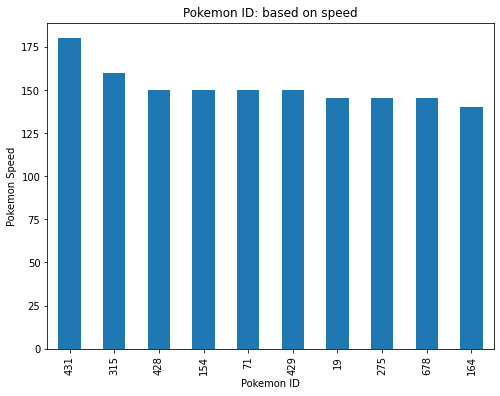

In [ ]:
#What are the 10 pokemon with the fastest speeds?
pokemon.sort_values(by = "Speed", ascending = False, inplace=True)
fastestPokemon = pokemon["Name"]
speedsOfpokemon = pokemon["Speed"]
# I faces a lot of issues concatinating the speed part so I left it only with the names of the pokemon
print(fastestPokemon.head(10))

plt.title("Pokemon ID: based on speed")
plt.xlabel("Pokemon ID")
plt.ylabel("Pokemon Speed")
print(speedsOfpokemon.head(10).plot(kind = "bar"))

In [ ]:
#out of gen 5 how many pokemons have a speed greater than 100
genSpeed100 = pd.crosstab(index = pokemon["Generation"] == 5, columns = pokemon["Speed"] > 100)
genSpeed100 


Speed,False,True
Generation,,
False,558,77
True,136,29


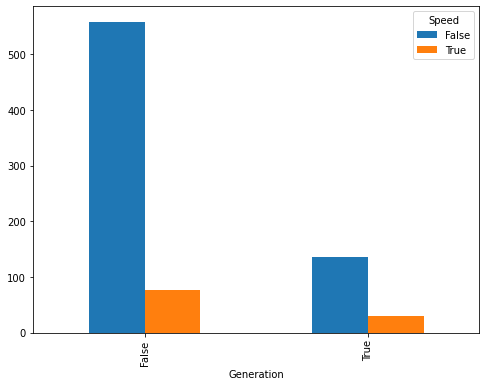

In [ ]:
genSpeed100.plot(kind = "bar")